In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import Delaunay
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.linear_model

In [2]:
dfWhite = pd.read_csv('../white.csv')
dfEmpty = pd.read_csv('../empty.csv')
dfBlack = pd.read_csv('../black.csv')
dfRed = pd.read_csv('../red120ms.csv')
dfGreen = pd.read_csv('../green120ms.csv')
#dfConveyor = pd.read_csv('data4.csv')
dfWhite.head(100)

,Red,Green,Blue,Clear,ColorTemp,Lux
0,62991,65535,56653,65535,5983,41522
1,64645,65535,57742,65535,6097,40188
2,62405,65535,55545,65535,5786,42524
3,62413,65535,55556,65535,5787,42513
4,62410,65535,55551,65535,5786,42518
...,...,...,...,...,...,...
86,58251,65535,53411,65535,5684,45434
87,53133,65535,46953,65535,4999,51822
88,65535,65535,59879,65535,6595,38335
89,65535,65535,59863,65535,6590,38347


In [3]:
dfWhite.columns

Index(['Red', 'Green', 'Blue', 'Clear', 'ColorTemp', 'Lux'], dtype='object')

In [4]:
dfWhitePoints = dfWhite[['Red','Green','Blue']].values
dfEmptyPoints = dfEmpty[['Red','Green','Blue']].values
dfBlackPoints = dfEmpty[['Red','Green','Blue']].values
dfWhiteTriangles = Delaunay(dfWhitePoints[:, :2])

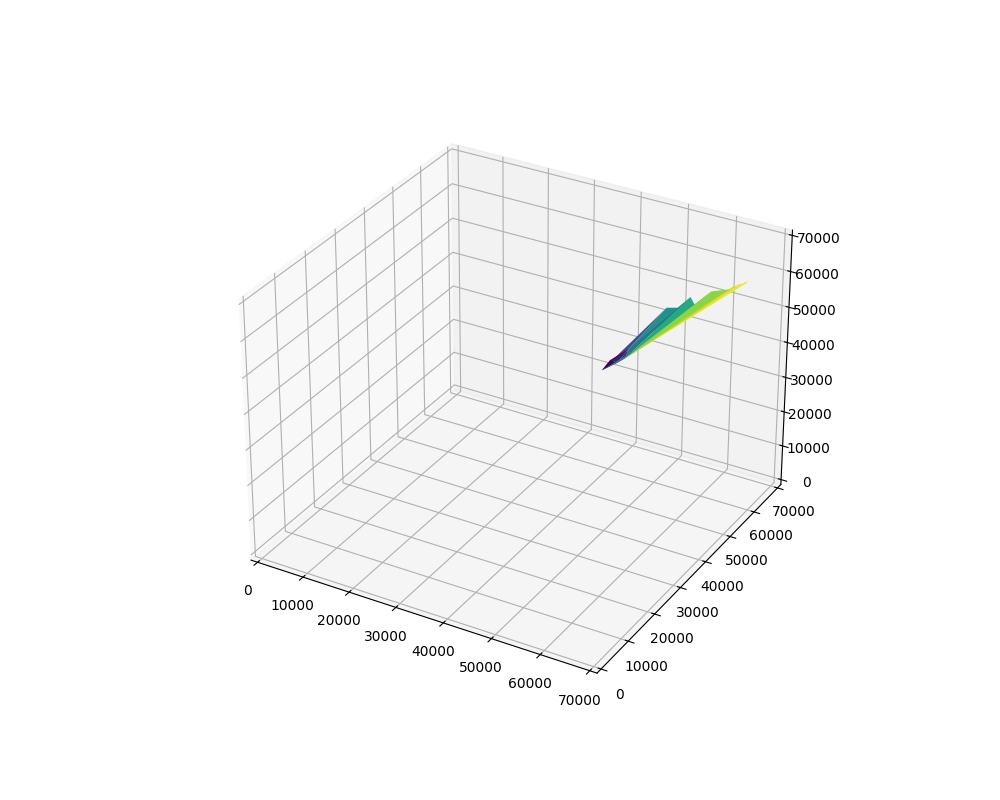

In [5]:
%matplotlib widget
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
ax.set_xlim(0, 70000)
ax.set_ylim(0, 70000)
ax.set_zlim(0, 70000)
# Plot the surface
ax.plot_trisurf(dfWhitePoints[:, 0], dfWhitePoints[:, 1], dfWhitePoints[:, 2], triangles=dfWhiteTriangles.simplices, cmap='viridis', edgecolor='none')

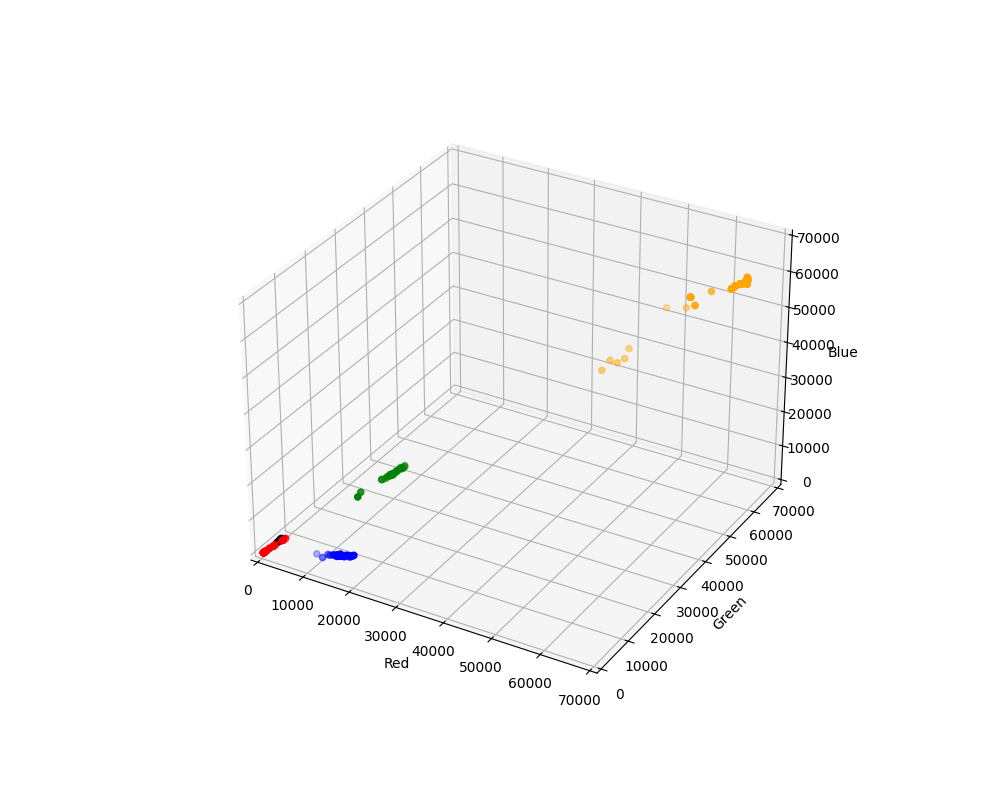

In [17]:
%matplotlib widget
plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.set_xlim(0, 70000)
ax.set_ylim(0, 70000)
ax.set_zlim(0, 70000)
# ax.set_xlim(1800, 3000)
# ax.set_ylim(2400, 3500)
# ax.set_zlim(2200, 3300)
ax.set_xlabel("Red")
ax.set_ylabel("Green")
ax.set_zlabel("Blue")

fg1 = ax.scatter3D(dfWhite['Red'], dfWhite['Green'], dfWhite['Blue'], color='orange')

fg2 = ax.scatter3D(dfEmpty['Red'], dfEmpty['Green'], dfEmpty['Blue'], color='red')

fg3 = ax.scatter3D(dfBlack['Red'], dfBlack['Green'], dfBlack['Blue'], color='black')

fg3 = ax.scatter3D(dfGreen['Red'], dfGreen['Green'], dfGreen['Blue'], color='green')

fg3 = ax.scatter3D(dfRed['Red'], dfRed['Green'], dfRed['Blue'], color='blue')

plt.plot([500, 2500], [900, 4000], [500, 3000], color='black', lw=2);
plt.plot([0, 3200], [0, 3500], [0, 3500], color='red', lw=2);

plt.plot(2300, 3000, 3000, 'bo');
# plt.plot([45000, 65536], [0, 3500], [0, 3500], color='red', lw=2);

#fg4 = ax.scatter3D(dfConveyor['r'], dfConveyor['g'], dfConveyor['b'])

In [7]:
dfWhite_train, dfWhite_test = train_test_split(dfWhite, test_size=0.2, random_state=50000)

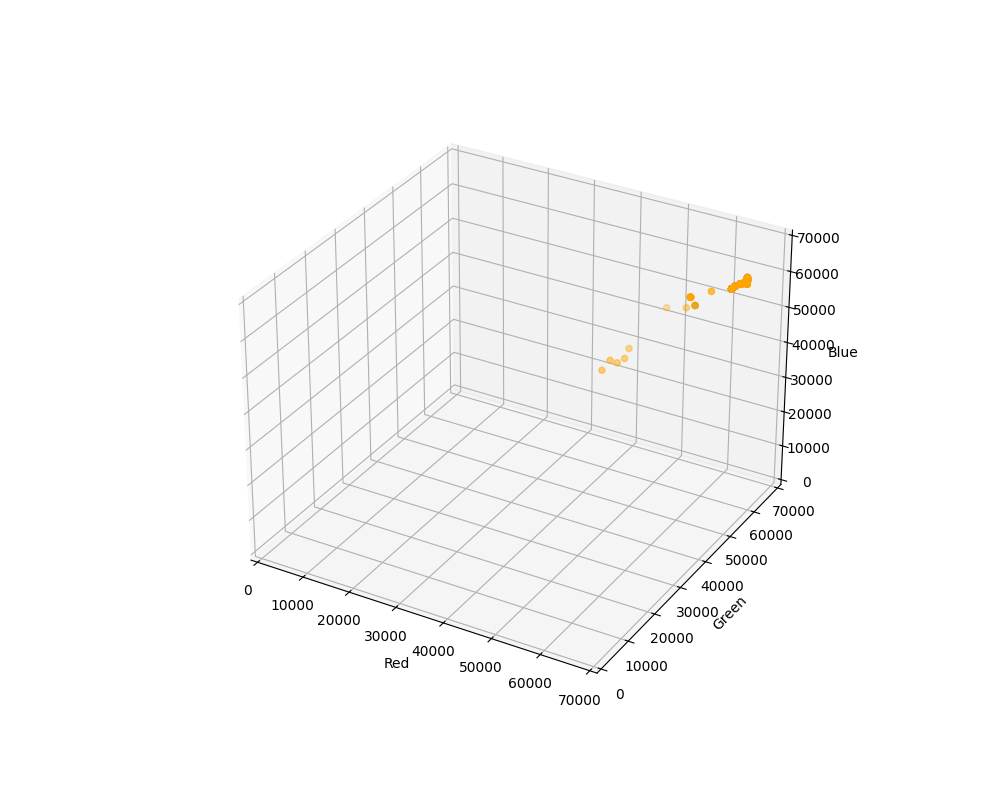

In [8]:
%matplotlib widget
plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.set_xlim(0, 70000)
ax.set_ylim(0, 70000)
ax.set_zlim(0, 70000)
ax.set_xlabel("Red")
ax.set_ylabel("Green")
ax.set_zlabel("Blue")

fg1 = ax.scatter3D(dfWhite_train['Red'], dfWhite_train['Green'], dfWhite_train['Blue'], color='orange')

fg2 = ax.scatter3D(dfWhite_test['Red'], dfWhite_test['Green'], dfWhite_test['Blue'], color='black')

#fg3 = ax.scatter3D(dfBlack['Red'], dfBlack['Green'], dfBlack['Blue'], color='black')

$y = \beta_0 + \sum_{i = 1}^m \beta_i x_i$

* $\beta_0$ and $\beta_i$ - fitted parameters
* $y$ - dependent variable
* $x_i$ - independent variables
* `reg.intercept_` - $\beta_0$ 
* `reg.coef_` - $\beta_i$ for $1 \leq i \leq m$.

In [9]:
#Linear regression for the Red
X_reg_train = dfWhite_train[['Green','Blue']].copy()
y_reg_train = dfWhite_train[['Red']].copy()

X_reg_train = dfWhite_test[['Green','Blue']].copy()
y_reg_train = dfWhite_test[['Red']].copy()

reg = LinearRegression()

reg.fit(X_reg_train.values, y_reg_train)

reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1]

(1838.0769519379464, 0.0, 1.0827773615644154)

In [10]:
#Linear regression for the Green
X_reg_train = dfWhite_train[['Red','Blue']].copy()
y_reg_train = dfWhite_train[['Green']].copy()

X_reg_train = dfWhite_test[['Red','Blue']].copy()
y_reg_train = dfWhite_test[['Green']].copy()

reg = LinearRegression()

reg.fit(X_reg_train.values, y_reg_train)

reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1]

(65535.0, 0.0, 0.0)

In [11]:
#Linear regression for the Blue
X_reg_train = dfWhite_train[['Red','Green']].copy()
y_reg_train = dfWhite_train[['Blue']].copy()

X_reg_train = dfWhite_test[['Red','Green']].copy()
y_reg_train = dfWhite_test[['Blue']].copy()

reg = LinearRegression()

reg.fit(X_reg_train.values, y_reg_train)

reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1]

(1097.9989742623293, 0.8792146858302761, 0.0)

In [12]:
dfWhite['Blue_predicted'] = reg.predict(dfWhite[['Red','Green']].values) 
dfWhite[['Blue','Blue_predicted']]

,Blue,Blue_predicted
0,56653,56480.611249
1,57742,57934.832340
2,55545,55965.391444
3,55556,55972.425161
4,55551,55969.787517
...,...,...
86,53411,52313.133639
87,46953,47813.312876
88,59879,58717.333410
89,59863,58717.333410
